# Phase 1 project

This note book is designed to analyse data National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters  and identify the lowest-risk aircraft for the company to purchase and operate in the commercial and private aviation sectors, providing actionable insights to guide decision-making for the new aviation division

Specifically, this will cover:

* Using pandas to filter data
* Using pandas to handle missing values
* Using matplotlib to create a graph using data from a dataframe

##  Task: Analyze Airplane Data

### The following questions are to be answered from the analysis of the data:
1. Determine which aircraft are the lowest risk for the company to start this new business endeavor.
2. Identify actionable insights to help the head of the new aviation division decide which aircraft to purchase.

### Data Understanding

In this repository under the file path `AviationData.csv` there is a CSV file containing information about events that occured on various aircrafts

There is also `USState_Codes.csv` which contains short form identifies of various states in the United states




### Requirements

#### 1. Filter Data to Relevant Columns

#### 2. Filter Data to Relevant Rows

#### 3. Drop Rows with Missing Values

#### 4. Identify lowest risk plane

#### 5. Plot charts to support the assement above

### Setup

In the cell below we import the relevant libraries



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Open up the CSV file as a dataframe called `df ` 

In the cell below we open the `AviationData.csv` file as a df and print the first 5 rows to get an overview of the data. The data is encoded in latin and the standard `pd.read_csv('data')`command doesn't work hence the need to add
`encoding=latin-1` arguement and setting `low_memory=False` to stop the printing of warnings

In [2]:
df=pd.read_csv('AviationData.csv',encoding='latin-1',low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Identify information about the data set
In the cells below we identify information about the dataset such number of columns and rows and datatypes represented by each column

In [3]:
#Get datatypes of each column and number of rows and columns
df.shape

(88889, 31)

In [4]:
#Get datatypes of each column and number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Overview analysis of the dataset 
* From the cells above, we can see that the dataset has `88889` rows and `31` columns
* The data has various datatypes
* Some columns seems to have null values

#### In the cell below, we will try and identify the number of null values in the dataset

In [5]:
#Percentage of null values from each column
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

## Analysis of the null values in the dataset
* From the cell above we can see almost all the cells have null values apart from 4 columns are `Event.Id`,`Investigation.Type`,`Accident.Number` and `Event.Date`
* We will drop all columns with null percentage value of over 40 % from the data set.This columns include  `Latitude`,`Longitude`,`Airport.Code`,`Airport.Name`,`Aircraft.Category`,`FAR.Description`,`Schedule`,`Air.carrier`.

We want to drop the above columns because there more or close to more missing data than available data, which makes it difficult to extract meaningful insights. Retaining such columns may introduce bias or inaccuracies in our analysis.

In [6]:
# List of columns to drop
columns_to_drop = [
    'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 
    'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier'
]

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [7]:
#Verifying the result that all columns with null percentage value of over 40% are dropped
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Injury.Severity            1.124999
Aircraft.damage            3.593246
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
Purpose.of.flight          6.965991
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5.053494
Broad.phase.of.flight     30.560587
Report.Status              7.178616
Publication.Date          15.492356
dtype: float64

# Dealing with remaining null values

## Location column

First we will start with columns that have non-numerical data such as `Location` 
We will drop all rows where column location is null. This is because the column `Location`  has a null percentage of  0.058500%. Dropping these rows means we are only losing a small portion of ourdata, which is often acceptable.

In [8]:
# Drop rows where 'Location' is null
df.dropna(subset=['Location'], inplace=True)

In [9]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.253273
Injury.Severity            1.125657
Aircraft.damage            3.587469
Registration.Number        1.457726
Make                       0.070916
Model                      0.103560
Amateur.Built              0.110314
Number.of.Engines          6.815854
Engine.Type                7.959521
Purpose.of.flight          6.958812
Total.Fatal.Injuries      12.817857
Total.Serious.Injuries    14.061709
Total.Minor.Injuries      13.411079
Total.Uninjured            6.642503
Weather.Condition          5.050823
Broad.phase.of.flight     30.535700
Report.Status              7.182818
Publication.Date          15.487916
dtype: float64

## Country column

Next we will move to the `Country` column. 

Similar to the Location column, We will drop all rows where column `country` is null. This is because the column `Location`  has a null percentage of  0.253273%. Dropping these rows means we are only losing a small portion of ourdata, which is often acceptable.

In [10]:
# Drop rows where 'Country' is null
df.dropna(subset=['Country'], inplace=True)

In [11]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            1.128515
Aircraft.damage            3.578522
Registration.Number        1.455785
Make                       0.069968
Model                      0.102695
Amateur.Built              0.110595
Number.of.Engines          6.825261
Engine.Type                7.972961
Purpose.of.flight          6.968582
Total.Fatal.Injuries      12.837990
Total.Serious.Injuries    14.086128
Total.Minor.Injuries      13.433846
Total.Uninjured            6.649212
Weather.Condition          5.058006
Broad.phase.of.flight     30.601950
Report.Status              7.201056
Publication.Date          15.462917
dtype: float64

## Injury.Severity column

Next we will move to the `Injury.Severity` column. 

Let's look at the type of data we are dealing with:

In [12]:
injury_severity_percentage = df['Injury.Severity'].value_counts(normalize=True) * 100
injury_severity_percentage

Non-Fatal     76.696115
Fatal(1)       7.004748
Fatal          6.006027
Fatal(2)       4.210610
Incident       2.496233
                ...    
Fatal(206)     0.001141
Fatal(141)     0.001141
Fatal(217)     0.001141
Fatal(54)      0.001141
Fatal(169)     0.001141
Name: Injury.Severity, Length: 109, dtype: float64

Seems like the data should have two categories which are `fatal` and `non-fatal`. But the way data has been stored the rows categorised as `fatal` have an integer placed in brackets making it seem like there more than two categories yet they referring to the same thing. We will clean up the rows by replacing all rows categorised as `fatal(int)` to `fatal`

In [13]:
# Replace 'Fatal(number)' with 'Fatal'
df['Injury.Severity'] = df['Injury.Severity'].str.replace(r'Fatal\(\d+\)', 'Fatal', regex=True)

# Verify the replacement
df['Injury.Severity'].value_counts(normalize=True) * 100

Non-Fatal      76.696115
Fatal          20.256358
Incident        2.496233
Minor           0.248824
Serious         0.197462
Unavailable     0.105008
Name: Injury.Severity, dtype: float64

### Analysis of `Injury.Severity` column
From the above verification we see that most injuries are Non-fatal then Followed by Fatal then Incident, Minor, Serious and finally Unavailable. Since the data is already skewed towards `Non-fatal` which represents 76% of the data we will replace all null values with `Non-fatal`

In [14]:
# Replace all null values in Injury.Severity to Non-Fatal
df['Injury.Severity'].fillna('Non-Fatal', inplace=True)

In [15]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            3.578522
Registration.Number        1.455785
Make                       0.069968
Model                      0.102695
Amateur.Built              0.110595
Number.of.Engines          6.825261
Engine.Type                7.972961
Purpose.of.flight          6.968582
Total.Fatal.Injuries      12.837990
Total.Serious.Injuries    14.086128
Total.Minor.Injuries      13.433846
Total.Uninjured            6.649212
Weather.Condition          5.058006
Broad.phase.of.flight     30.601950
Report.Status              7.201056
Publication.Date          15.462917
dtype: float64

## Aircraft.damage column

Next we will move to the `Aircraft.damage` column. 

The column has 3% missing value percentage. Let's look at how the data is categorised in this column

In [16]:
aircraft_damage_percentage = df['Aircraft.damage'].value_counts(normalize=True) * 100
aircraft_damage_percentage

Substantial    74.928898
Destroyed      21.673435
Minor           3.258389
Unknown         0.139277
Name: Aircraft.damage, dtype: float64

### Analysis of `Aircraft.damage` column

The data seems to be categorical where we have three categories which are Substantial, Destroyed,Unknown and Minor. And the dataset seems to be skeweed towards the value Substantial as it accounts for 74% of the total value. I will replace all null values with `Substantial` value 


In [17]:
# Replace all null values in Aircraft.damage to Non-Fatal
df['Aircraft.damage'].fillna('Substantial', inplace=True)

In [18]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        1.455785
Make                       0.069968
Model                      0.102695
Amateur.Built              0.110595
Number.of.Engines          6.825261
Engine.Type                7.972961
Purpose.of.flight          6.968582
Total.Fatal.Injuries      12.837990
Total.Serious.Injuries    14.086128
Total.Minor.Injuries      13.433846
Total.Uninjured            6.649212
Weather.Condition          5.058006
Broad.phase.of.flight     30.601950
Report.Status              7.201056
Publication.Date          15.462917
dtype: float64

## Registration.Number column

Next we will move to the `Registration.Number` column. 

The column has 1.2% missing value percentage. Let's look at how the data is categorised in this column

In [19]:
registration_number_percentage = df['Registration.Number'].value_counts(normalize=True) * 100
registration_number_percentage

NONE      0.392799
UNREG     0.144294
None      0.074437
UNK       0.014887
USAF      0.010307
            ...   
N5832N    0.001145
N6438W    0.001145
N5678E    0.001145
N2761M    0.001145
N543BP    0.001145
Name: Registration.Number, Length: 78887, dtype: float64

### Analysis of `Registration.Number` column

The data seems to be unique such that each aircraft had a unique registration number and since almost all the rows had the registration number filled apart from 1.2%, we will drop the null values

In [20]:
# Drop rows where 'Registration.Number' is null
df.dropna(subset=['Registration.Number'], inplace=True)

In [21]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.028630
Model                      0.061840
Amateur.Built              0.036646
Number.of.Engines          5.556446
Engine.Type                7.054351
Purpose.of.flight          6.427933
Total.Fatal.Injuries      12.432148
Total.Serious.Injuries    13.321958
Total.Minor.Injuries      12.584458
Total.Uninjured            5.906873
Weather.Condition          4.684959
Broad.phase.of.flight     29.614530
Report.Status              7.270791
Publication.Date          15.439408
dtype: float64

## Make column

Next we will move to the `Make` column. 

The column has 0.02% missing value percentage. Let's look at how the data is categorised in this column

In [22]:
make_number_percentage = df['Make'].value_counts(normalize=True) * 100
make_number_percentage

Cessna                25.099373
Piper                 13.617879
CESSNA                 5.635933
Beech                  4.869583
PIPER                  3.254407
                        ...    
Gippsland              0.001146
Fogarty Pitts          0.001146
Kuhn                   0.001146
Reviere                0.001146
TAFT, MALCOLM J SR     0.001146
Name: Make, Length: 8218, dtype: float64

### Analysis of `Make` column
First we see that there two categories `Cessna` and `CESSNA` which seems to be reffering to the same category. We will replace one with the other

We will drop all rows where column `make` is null. This is because the column `make`  has a null percentage of  0.02%. Dropping these rows means we are only losing a small portion of ourdata, which is often acceptable. 

In [23]:
# Replace CESSNA with Cessna
df['Make'] = df['Make'].replace('CESSNA', 'Cessna')

# Replace PIPER with Piper
df['Make'] = df['Make'].replace('PIPER', 'Piper')

#verifying the replacement
df['Make'].value_counts(normalize=True) * 100

Cessna                30.735306
Piper                 16.872287
Beech                  4.869583
Bell                   2.241772
Boeing                 1.524680
                        ...    
Gippsland              0.001146
Fogarty Pitts          0.001146
Kuhn                   0.001146
Reviere                0.001146
TAFT, MALCOLM J SR     0.001146
Name: Make, Length: 8216, dtype: float64

In [24]:
# Drop rows where 'Make' is null
df.dropna(subset=['Make'], inplace=True)

In [25]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.051548
Amateur.Built              0.035511
Number.of.Engines          5.544291
Engine.Type                7.040334
Purpose.of.flight          6.420610
Total.Fatal.Injuries      12.433417
Total.Serious.Injuries    13.323482
Total.Minor.Injuries      12.584625
Total.Uninjured            5.906274
Weather.Condition          4.674846
Broad.phase.of.flight     29.606974
Report.Status              7.260272
Publication.Date          15.443830
dtype: float64

## Model column

Next we will move to the `Model` column. 

The column has 0.04% missing value percentage. Let's look at how the data is categorised in this column

In [26]:
model_number_percentage = df['Model'].value_counts(normalize=True) * 100
model_number_percentage

152               2.704809
172               1.996516
172N              1.324898
PA-28-140         1.062440
150               0.945537
                    ...   
STRETCHED         0.001146
PT-17 STEARMAN    0.001146
Smith Trike       0.001146
OH-13E-M74        0.001146
SPEZIO TUHOLER    0.001146
Name: Model, Length: 12064, dtype: float64

In [27]:
# Find unique values in the 'Model' column
unique_model = df['Model'].unique()

# Display the unique values
print(unique_model)

['108-3' 'PA24-180' '172M' ... 'ROTORWAY EXEC 162-F' 'KITFOX S5'
 'M-8 EAGLE']


### Analysis of `Model` column
The data seems to be categorised well with no data not looking ot of place


We will drop all rows where column `model` is null. This is because the column `model`  has a null percentage of  0.04%. Dropping these rows means we are only losing a small portion of ourdata, which is often acceptable. 

In [28]:
# Drop rows where 'Model' is null
df.dropna(subset=['Model'], inplace=True)

In [29]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.035529
Number.of.Engines          5.537982
Engine.Type                7.023335
Purpose.of.flight          6.412460
Total.Fatal.Injuries      12.431807
Total.Serious.Injuries    13.321185
Total.Minor.Injuries      12.584239
Total.Uninjured            5.905882
Weather.Condition          4.662357
Broad.phase.of.flight     29.605052
Report.Status              7.249117
Publication.Date          15.449503
dtype: float64

## Amateur.Built column

Next we will move to the `Amateur.Built` column. 

The column has 0.03% missing value percentage. Let's look at how the data is categorised in this column

In [30]:
# Find unique values in the 'Amateur.Built' column
unique_amateur_built = df['Amateur.Built'].unique()

# Display the unique values
print(unique_amateur_built)

['No' 'Yes' nan]


In [31]:
amateur_built_percentage = df['Amateur.Built'].value_counts(normalize=True) * 100
amateur_built_percentage

No     90.372731
Yes     9.627269
Name: Amateur.Built, dtype: float64

### Analysis of `Amateur.Built` column
The data seems to be categorised well with no data not looking ot of place

We will fill the null values with no since it won't skew the data any further

In [32]:
# Fill null values in 'Amateur.Built' column with 'No'
df['Amateur.Built'].fillna('No', inplace=True)

In [33]:
# Verify the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          5.537982
Engine.Type                7.023335
Purpose.of.flight          6.412460
Total.Fatal.Injuries      12.431807
Total.Serious.Injuries    13.321185
Total.Minor.Injuries      12.584239
Total.Uninjured            5.905882
Weather.Condition          4.662357
Broad.phase.of.flight     29.605052
Report.Status              7.249117
Publication.Date          15.449503
dtype: float64

## Number.of.Engines column

Next we will move to the `Number.of.Engines` column. 

The column has 4.1% missing value percentage. Let's look at how the data is categorised in this column

In [34]:
# Find unique values in the 'Number.of.Engines' column
unique_number_engines = df['Number.of.Engines'].unique()

# Display the unique values
print(unique_number_engines)

[ 1. nan  2.  0.  3.  4.  8.  6.]


In [35]:
number_engine_percentage = df['Number.of.Engines'].value_counts(normalize=True) * 100
number_engine_percentage

1.0    84.162825
2.0    13.297743
0.0     1.452317
3.0     0.572677
4.0     0.509585
8.0     0.003640
6.0     0.001213
Name: Number.of.Engines, dtype: float64

In [36]:
# Calculate mean and median of 'Number.of.Engines'
mean_engines = df['Number.of.Engines'].mean()
median_engines = df['Number.of.Engines'].median()

# Display the results
print(f"Mean: {mean_engines}")
print(f"Median: {median_engines}")

Mean: 1.145510798349915
Median: 1.0


### Analysis of `Number.of.Engines` column

The data has 6 categories of engines in which 1-engine aircraft is 85.89% followed by 2-engine aircraft with a percentage of 12%.

The mean of the engine is 1.12 and the median is 1.

From the above we will fill the null values with 1 which will not skew the data in any way since 1 engine aircraft are already majority


In [37]:
# Fill null values in 'Number.of.Engines' column with 1'
df['Number.of.Engines'].fillna(1, inplace=True)

In [38]:
#verification of replacement
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                7.023335
Purpose.of.flight          6.412460
Total.Fatal.Injuries      12.431807
Total.Serious.Injuries    13.321185
Total.Minor.Injuries      12.584239
Total.Uninjured            5.905882
Weather.Condition          4.662357
Broad.phase.of.flight     29.605052
Report.Status              7.249117
Publication.Date          15.449503
dtype: float64

## Engine.Type column

Next we will move to the `Engine.Type` column. 

The column has 5.1% missing value percentage. Let's look at how the data is categorised in this column

In [39]:
# Find unique values in the 'Number.of.Engines' column
unique_engine_type = df['Engine.Type'].unique()

# Display the unique values
print(unique_engine_type)

['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'None' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR'
 'NONE' 'UNK']


In [40]:
#Find value counts in percentage form of each engine type
engine_type_percentage = df['Engine.Type'].value_counts(normalize=True) * 100
engine_type_percentage

Reciprocating      85.491347
Turbo Shaft         4.330408
Turbo Prop          4.159065
Turbo Fan           3.007741
Unknown             2.095557
Turbo Jet           0.857946
None                0.023421
Geared Turbofan     0.014792
Electric            0.012327
NONE                0.002465
LR                  0.002465
UNK                 0.001233
Hybrid Rocket       0.001233
Name: Engine.Type, dtype: float64

### Analysis of `Engine.Type` column

From the analysis the engine type, the engine type with highest percentage is Reciprocating engines at 87% followed by Turbo Shaft, Turbo prop.

From the analysis we seem to be having two categories having `NONE` and `none` engine types. I assumed that the they are referring to the same engine type first thing is will replace all `NONE` with `none`

In [41]:
# Replace 'NONE' with 'none' in the 'Engine.Type' column
df['Engine.Type'] = df['Engine.Type'].replace('NONE', 'none')

# Verify the replacement
print(df['Engine.Type'].value_counts())

Reciprocating      69354
Turbo Shaft         3513
Turbo Prop          3374
Turbo Fan           2440
Unknown             1700
Turbo Jet            696
None                  19
Geared Turbofan       12
Electric              10
none                   2
LR                     2
UNK                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64


### Analysis of `Engine.Type` column continued

Since the percentage of null values is 5.5% we will replace the null values with Reciprocating engine type since the data is already skewed towards the engine type

In [42]:
# Fill null values in 'Engine.Type' column with Reciprocating
df['Engine.Type'].fillna('Reciprocating', inplace=True)

In [43]:
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          6.412460
Total.Fatal.Injuries      12.431807
Total.Serious.Injuries    13.321185
Total.Minor.Injuries      12.584239
Total.Uninjured            5.905882
Weather.Condition          4.662357
Broad.phase.of.flight     29.605052
Report.Status              7.249117
Publication.Date          15.449503
dtype: float64

## Purpose.of.flight column

Next we will move to the `Purpose.of.flight` column. 

The column has 4.3% missing value percentage. Let's look at how the data is categorised in this column

In [44]:
# Find unique values in the 'Purpose.of.flight' column
unique_purpose_flight = df['Purpose.of.flight'].unique()

# Display the unique values
print(unique_purpose_flight)

['Personal' nan 'Business' 'Instructional' 'Unknown' 'Ferry'
 'Executive/corporate' 'Aerial Observation' 'Aerial Application'
 'Public Aircraft' 'Skydiving' 'Other Work Use' 'Positioning'
 'Flight Test' 'Air Race/show' 'Air Drop' 'Public Aircraft - Federal'
 'Glider Tow' 'Public Aircraft - Local' 'External Load'
 'Public Aircraft - State' 'Banner Tow' 'Firefighting' 'Air Race show'
 'PUBS' 'ASHO' 'PUBL']


In [45]:
#Find value counts of each unique purpose
purpose_flight_percentage = df['Purpose.of.flight'].value_counts(normalize=True) * 100
purpose_flight_percentage

Personal                     60.220189
Instructional                12.900302
Unknown                       7.786228
Aerial Application            5.739863
Business                      4.836083
Positioning                   1.970437
Other Work Use                1.514873
Ferry                         0.977259
Aerial Observation            0.935621
Public Aircraft               0.865817
Executive/corporate           0.649056
Flight Test                   0.489854
Skydiving                     0.220434
External Load                 0.146956
Public Aircraft - Federal     0.124913
Banner Tow                    0.123688
Air Race show                 0.121239
Public Aircraft - Local       0.090623
Public Aircraft - State       0.077152
Air Race/show                 0.072253
Glider Tow                    0.064906
Firefighting                  0.046536
Air Drop                      0.012246
ASHO                          0.007348
PUBS                          0.004899
PUBL                     

### Analysis of `Purpose.of.flight` column 

The data in this column seems to be skeweed towards Personal as the purpose of the flight and the null values percentage is 4.3%. I have decided to replace null data values with the value `Personal` since it won't have an effect on general skeweness of data

In [46]:
# Fill null values in 'Purpose.of.flight' column with Reciprocating
df['Purpose.of.flight'].fillna('Personal', inplace=True)
# Verify the replacement
df['Purpose.of.flight'].value_counts(normalize=True) * 100

Personal                     62.771054
Instructional                12.073076
Unknown                       7.286939
Aerial Application            5.371797
Business                      4.525971
Positioning                   1.844084
Other Work Use                1.417733
Ferry                         0.914592
Aerial Observation            0.875625
Public Aircraft               0.810297
Executive/corporate           0.607436
Flight Test                   0.458442
Skydiving                     0.206299
External Load                 0.137533
Public Aircraft - Federal     0.116903
Banner Tow                    0.115757
Air Race show                 0.113464
Public Aircraft - Local       0.084812
Public Aircraft - State       0.072205
Air Race/show                 0.067620
Glider Tow                    0.060744
Firefighting                  0.043552
Air Drop                      0.011461
ASHO                          0.006877
PUBS                          0.004584
PUBL                     

In [47]:
#Verify whether the percentage of null values is now zero
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries      12.431807
Total.Serious.Injuries    13.321185
Total.Minor.Injuries      12.584239
Total.Uninjured            5.905882
Weather.Condition          4.662357
Broad.phase.of.flight     29.605052
Report.Status              7.249117
Publication.Date          15.449503
dtype: float64

## Injuries column

We will move to the next four columns which deal with injuries. The columns are `Total.Fatal.Injuries`, `Total.Serious.Injuries`,`Total.Minor.Injuries`and `Total.Uninjured` 

The Distribution of null values for each of the above columns is listed below:

* Total.Fatal.Injuries - 12.532674%
* Total.Serious.Injuries - 13.654647%
* Total.Minor.Injuries - 12.733197%
* Total.Uninjured - 6.118332%

We will first get identify the datatypes stored on each of the above 4 listed columns in order to proceed with our analysis. I will create function to handle the above in order to prevent code repetition

In [48]:
#Function to identify data types 

def print_column_dtype(df, column_name):
    """
    Prints the name of the column and its data type.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the column.
        column_name (str): The name of the column.
    """
    if column_name in df.columns:
        dtype = df[column_name].dtype
        print(f"The column '{column_name}' has data type: {dtype}")
    else:
        print(f"Column '{column_name}' does not exist in the DataFrame.")


In [49]:
#Identiying data types in each of the four Injury columns
print_column_dtype(df, 'Total.Fatal.Injuries')
print_column_dtype(df, 'Total.Serious.Injuries')
print_column_dtype(df, 'Total.Minor.Injuries')
print_column_dtype(df, 'Total.Uninjured')

The column 'Total.Fatal.Injuries' has data type: float64
The column 'Total.Serious.Injuries' has data type: float64
The column 'Total.Minor.Injuries' has data type: float64
The column 'Total.Uninjured' has data type: float64


### Analysis of Injuries columns
First we can see that data type of all listed columns above is float. This means that we are dealing with numerical data. We can therefore calculate measures of central tendency.

We will then do the mean and median of all the four columns together to avoid repeating the same code

In [50]:
#Function to get the mean and median based on column passed
def print_column_stats(df, column_name):
    """
    Prints the mean and median of a specified column in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the column.
        column_name (str): The name of the column.
    """
    if column_name in df.columns:
        mean_value = df[column_name].mean()
        median_value = df[column_name].median()
        print(f"The column '{column_name}' has:")
        print(f"Mean: {mean_value}")
        print(f"Median: {median_value}")
    else:
        print(f"Column '{column_name}' does not exist in the DataFrame.")

In [51]:
#Identiying mean and median in each of the four Injury columns

print_column_stats(df, 'Total.Fatal.Injuries')
print_column_stats(df, 'Total.Serious.Injuries')
print_column_stats(df, 'Total.Minor.Injuries')
print_column_stats(df, 'Total.Uninjured')

The column 'Total.Fatal.Injuries' has:
Mean: 0.5405012760944964
Median: 0.0
The column 'Total.Serious.Injuries' has:
Mean: 0.26541406074389456
Median: 0.0
The column 'Total.Minor.Injuries' has:
Mean: 0.33859083280889446
Median: 0.0
The column 'Total.Uninjured' has:
Mean: 5.108844200294766
Median: 1.0


### Analysis of Injuries columns continued

#### `Total.Fatal.Injuries`
From the above function we can see that the mean and median of the Fatal Injuries is 0.5584 and 0 respectively.

#### `Total.Serious.Injuries`
The mean and median of the Serious Injuries is 0.2581 and 0 respectively.

#### `Total.Minor.Injuries`
The mean and median of the Minor Injuries is 0.3309 and 0 respectively.

#### `Total.Uninjured`
The mean and median of the Uninjured is 3.3095 and 0 respectively.

This does not guide us on how to deal with the null values.We will plot Histogram to view how the data is skewed for each of the four columns

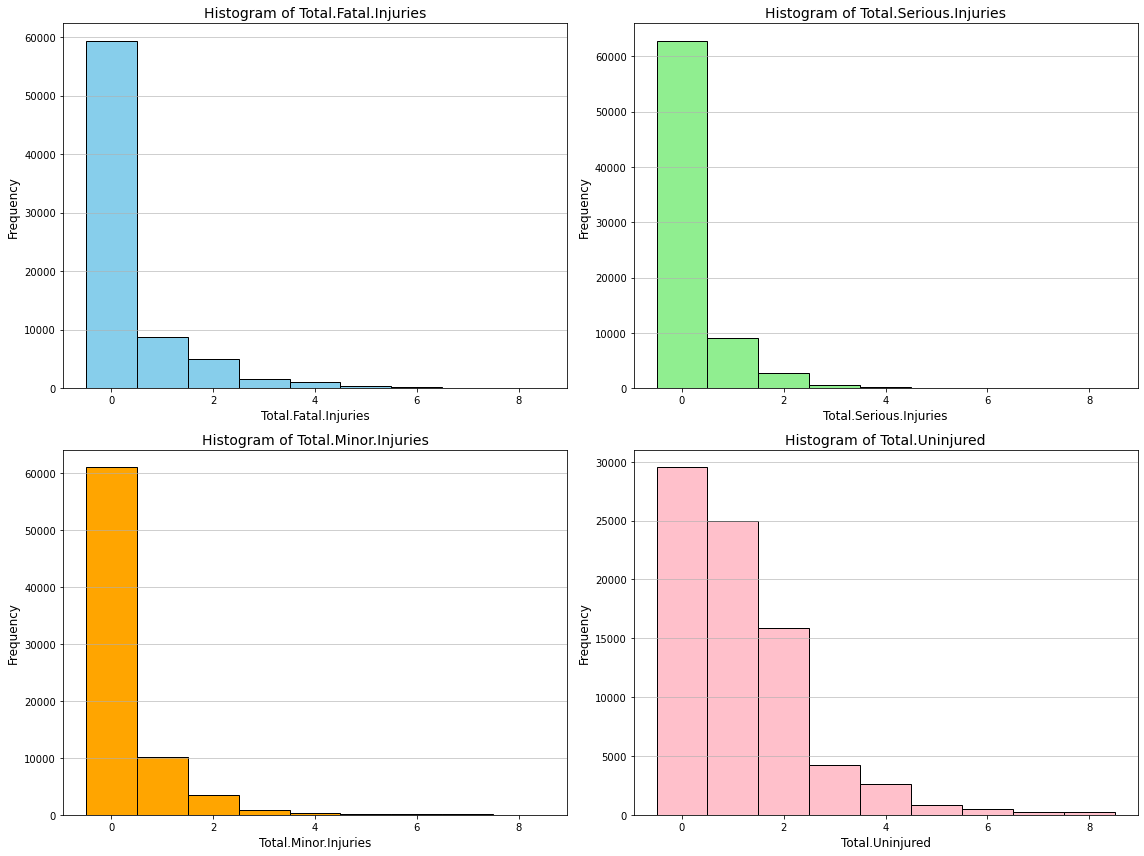

In [52]:
# Define the columns and corresponding colors
columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
colors = ['skyblue', 'lightgreen', 'orange', 'pink']

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Create a 2x2 grid
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plot each column
for i, col in enumerate(columns):
    axes[i].hist(df[col].dropna(), bins=range(0, 10), 
                 color=colors[i], edgecolor='black', align='left')
    axes[i].set_title(f'Histogram of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(axis='y', alpha=0.75)

# Adjust layout
plt.tight_layout()
plt.show()

### Analysis of Injuries column continued

From the histogram above, looking at the `Total Fatal Injuries`, `Total Serious Injuries` and `Total Minor Injuries`. The data seems to skewed towards 0 which is all the above three columns have a median of zero. Therefore we will fill all null values with 0 since the data is already and it won't have an effect on the data

For the last remaining column, `Total Uninjured`, the mean is 3.3 but looking at the data, is skewed towards 0 and since our median is 1, we will fill all null values with 1

Below I will fill fill all the columns above with respective median value as discussed above


In [53]:
# Fill null values in 'Total.Fatal.Injuries' column with 0
df['Total.Fatal.Injuries'].fillna(0, inplace=True)

# Fill null values in 'Total Serious Injuries' column with 0
df['Total.Serious.Injuries'].fillna(0, inplace=True)

# Fill null values in 'Total.Fatal.Injuries' column with 0
df['Total.Minor.Injuries'].fillna(0, inplace=True)

# Fill null values in 'Total.Fatal.Injuries' column with 0
df['Total.Uninjured'].fillna(1, inplace=True)

In [54]:
#Verifying null values have been replaced
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          4.662357
Broad.phase.of.flight     29.605052
Report.Status              7.249117
Publication.Date          15.449503
dtype: float64

##  Weather condition column
Next we will move to the `Weather.Condition` column. 

The column has 3.09% missing value percentage. Let's look at how the data is categorized in the column

In [55]:
#Get ditribution of data in the column
weather_condition_percentage = df['Weather.Condition'].value_counts(normalize=True) * 100
weather_condition_percentage

VMC    91.898682
IMC     6.967686
UNK     0.818667
Unk     0.314964
Name: Weather.Condition, dtype: float64

### Analysis of Weather condition column

From the above distribution we can see there four categorizations of the weather conditions, VMC,IMC,UNK and Unk.But seems like the last two categories might be reffering to the same weather condition

We will replace all values containing 'Unk' to 'UNK'.

In [56]:
# Replace unk with UNK
df['Weather.Condition'] = df['Weather.Condition'].replace('Unk', 'UNK')

#verifying the replacement
df['Weather.Condition'].value_counts(normalize=True) * 100

VMC    91.898682
IMC     6.967686
UNK     1.133631
Name: Weather.Condition, dtype: float64

### Analysis of Weather condition column continued

From the value counts function above, VMC weather condition seems to be taking the highest percentage of about 92%. This means that the data is skewed towards VMC, hence therefore we will fill the null values with VMC


In [57]:
# Fill null values in 'Total.Fatal.Injuries' column with 0
df['Weather.Condition'].fillna('VMC', inplace=True)

In [58]:
#Verifying null values have been replaced
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          0.000000
Broad.phase.of.flight     29.605052
Report.Status              7.249117
Publication.Date          15.449503
dtype: float64

##  Broad.phase.of.flight column

Next we will move to the `Broad.phase.of.flight` column. 

The column has 28.4% missing value percentage. Let's look at how the data is categorized in the column


In [59]:
#Get distribution of data in the column
phase_flight_percentage = df['Broad.phase.of.flight'].value_counts(normalize=True) * 100
phase_flight_percentage

Landing        25.033783
Takeoff        20.229238
Cruise         16.626235
Maneuvering    13.210465
Approach       10.608749
Climb           3.287149
Taxi            3.165041
Descent         3.051074
Go-around       2.199573
Standing        1.520653
Unknown         0.874294
Other           0.193745
Name: Broad.phase.of.flight, dtype: float64

### Analysis of Broad.phase.of.flight column
The data contained in this column does not help in objectively answering the question at hand therefore I have decided to drop the column altogether


In [60]:
#Dropping Broad.phase.of.flight column
df.drop(columns=['Broad.phase.of.flight'], inplace=True)

#Verifying the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          0.000000
Report.Status              7.249117
Publication.Date          15.449503
dtype: float64

##  Report.Status column

Next we will move to the `Report.Status` column. 

The column has 5.7% missing value percentage. Let's look at how the data is categorized in the column

In [61]:
#Get distribution of data in the column
report_status_percentage = df['Report.Status'].value_counts(normalize=True) * 100
report_status_percentage

Probable Cause                                                                                                                                                                                                                                75.933866
Foreign                                                                                                                                                                                                                                        0.910697
<br /><br />                                                                                                                                                                                                                                   0.206359
Factual                                                                                                                                                                                                                                        0.176702
The pilo

### Analysis of Report.Status column

From the above distribution we can see there are about 16603 unique categorizations of the report status but the most common data recorded was `Probable Cause` occupying a percentage of about 76.0%. Since the data is already skewed towards this value, I will replace the null values with the value `Probable Cause`


In [62]:
# Fill null values in 'Report.Status' column with Probable Cause
df['Report.Status'].fillna('Probable Cause', inplace=True)

#Verifying the result
df.isna().sum()/ len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          0.000000
Report.Status              0.000000
Publication.Date          15.449503
dtype: float64

##  Publication.Date column

Finally in our data clean up, we will go to the `Publication.Date` column. 

From the description, the column seems to have dates when the events were published, I will drop this column since it does not objectively help us answer the problem statement

In [63]:
#Dropping Publication.Date Column
df.drop(columns=['Publication.Date'], inplace=True)

#Verifying the result
df.isna().sum()/ len(df) * 100

Event.Id                  0.0
Investigation.Type        0.0
Accident.Number           0.0
Event.Date                0.0
Location                  0.0
Country                   0.0
Injury.Severity           0.0
Aircraft.damage           0.0
Registration.Number       0.0
Make                      0.0
Model                     0.0
Amateur.Built             0.0
Number.of.Engines         0.0
Engine.Type               0.0
Purpose.of.flight         0.0
Total.Fatal.Injuries      0.0
Total.Serious.Injuries    0.0
Total.Minor.Injuries      0.0
Total.Uninjured           0.0
Weather.Condition         0.0
Report.Status             0.0
dtype: float64

## Identifying the useful columns 

In order to answer the question above we will need to identify columns that will help us determine which aircraft are the lowest risk for the company to start this new business endeavor.The columns are 

* Injury.Severity 
* Aircraft.damage
* Make
* Model
* Amateur.Built
* Number.of.Engines
* Engine.Type 
* Purpose.of.flight
* Total.Fatal.Injuries
* Total.Serious.Injuries
* Total.Uninjured

The first set of columns we will look at is `Injury Severity` vs `Make of Plane`

## Injury Severity vs Make 

We will group the data by these two columns to find the distribution of the Make againist the injury severity reported

In [64]:
# Group by Injury.Severity and Make
injury_make_summary = df.groupby(['Injury.Severity', 'Make']).size().reset_index(name='Count')

# Display the result
print(injury_make_summary)

     Injury.Severity                      Make  Count
0              Fatal  107.5 Flying Corporation      1
1              Fatal                1st Ftr Gp      1
2              Fatal                2000 Mccoy      1
3              Fatal                    3XTRIM      1
4              Fatal                85 Manista      1
...              ...                       ...    ...
9383     Unavailable                    Cessna      3
9384     Unavailable              Hiller-soloy      1
9385     Unavailable                    Hughes      1
9386     Unavailable         Mcdonnell Douglas      3
9387     Unavailable                     Piper      4

[9388 rows x 3 columns]


### Injury Severity vs Make 

From the results above we see that there over 9392 rows, therefore we will only classify the top 10 makes whose distribution was Non-Fatal. 

In [65]:
# Filter non-fatal injuries
fatal_injuries = injury_make_summary[injury_make_summary['Injury.Severity'] == 'Non-Fatal']

# Aggregate and get the top 10 makes with the highest non-fatal injuries
top_10_non_fatal_injuries = (
    fatal_injuries.groupby('Make')['Count']
    .sum()
    .nlargest(10)
    .reset_index()
)

# Display the results
print(top_10_non_fatal_injuries)

       Make  Count
0    Cessna  22084
1     Piper  11434
2     Beech   2907
3      Bell   1573
4    BOEING   1082
5   Grumman    967
6    Mooney    772
7    Boeing    757
8  Robinson    725
9     BEECH    700


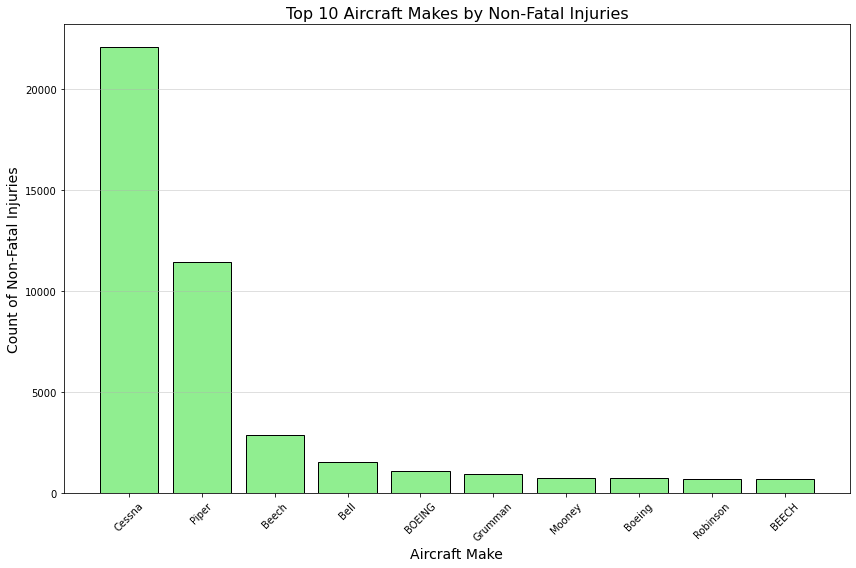

In [66]:
# Filter for non-fatal injuries
non_fatal_injuries = injury_make_summary[injury_make_summary['Injury.Severity'] == 'Non-Fatal']

# Aggregate total non-fatal injuries by 'Make'
top_non_fatal_injuries = (
    non_fatal_injuries.groupby('Make')['Count']
    .sum()
    .nlargest(10)
    .reset_index()
)

# Plot histogram
plt.figure(figsize=(12, 8))
plt.bar(top_non_fatal_injuries['Make'], top_non_fatal_injuries['Count'], color='lightgreen', edgecolor='black')

# Add plot details
plt.title('Top 10 Aircraft Makes by Non-Fatal Injuries', fontsize=16)
plt.xlabel('Aircraft Make', fontsize=14)
plt.ylabel('Count of Non-Fatal Injuries', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

### Injury Severity vs Make Continued

From the data above we can see the top 10 makes that had the highest number of non-fatal injuries. We will proceed to look at the top 10 Makes with Fatal crashes

In [67]:
# Filter non-fatal injuries
fatal_injuries = injury_make_summary[injury_make_summary['Injury.Severity'] == 'Fatal']

# Aggregate and get the top 10 makes with the highest non-fatal injuries
top_10_non_fatal_injuries = (
    fatal_injuries.groupby('Make')['Count']
    .sum()
    .nlargest(10)
    .reset_index()
)

# Display the results
print(top_10_non_fatal_injuries)

       Make  Count
0    Cessna   4427
1     Piper   3107
2     Beech   1192
3      Bell    341
4     BEECH    329
5    Mooney    297
6  Bellanca    188
7      BELL    168
8  ROBINSON    157
9  Robinson    142


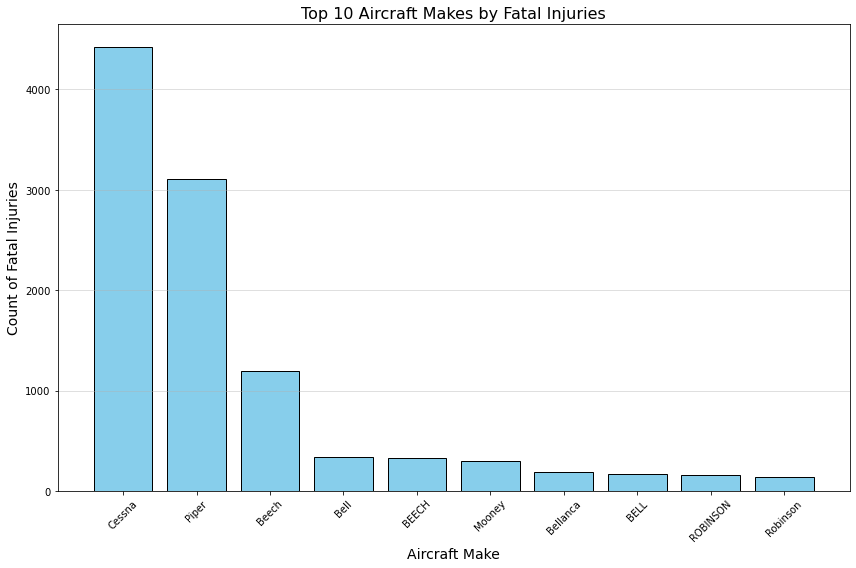

In [68]:
# Aggregate total fatal injuries by 'Make' and filter top 10 makes
top_makes = fatal_injuries.groupby('Make')['Count'].sum().nlargest(10).reset_index()

# Plot histogram
plt.figure(figsize=(12, 8))
plt.bar(top_makes['Make'], top_makes['Count'], color='skyblue', edgecolor='black')

# Add plot details
plt.title('Top 10 Aircraft Makes by Fatal Injuries', fontsize=16)
plt.xlabel('Aircraft Make', fontsize=14)
plt.ylabel('Count of Fatal Injuries', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

#### Normalizing the data

From the data above we can see some makes appear top as `fatal` and `non-fatal`. This will appear to not make sense at the moment but it could probaly mean that it was the most commonly used aircraft make hence the high number of fatal and non-fatal occurences. We normalize the data by getting all occurences of the of the make recorded againist non-fatal injuries then we will also do the same for fatal injuries

In [69]:
# Get total incidents per Make
total_incidents_per_make = df.groupby('Make')['Event.Id'].count()

# Convert the top non-fatal injuries list into a DataFrame
top_non_fatal_injuries_df = pd.DataFrame({
    'Make': ['Cessna', 'Piper', 'Beech', 'Bell', 'BOEING', 'Grumman', 'Mooney', 'Boeing', 'Robinson', 'BEECH'],
    'Non_Fatal_Injuries': [22084, 11434, 2907, 1573, 1082, 967, 772, 757, 725, 700]
})

# Merge with total incidents to calculate the normalized injury rate
top_non_fatal_injuries_df['Total_Incidents'] = top_non_fatal_injuries_df['Make'].map(total_incidents_per_make)
top_non_fatal_injuries_df['Normalized_Injury_Rate'] = (
    top_non_fatal_injuries_df['Non_Fatal_Injuries'] / top_non_fatal_injuries_df['Total_Incidents']
)

# Display the normalized table
print(top_non_fatal_injuries_df)

       Make  Non_Fatal_Injuries  Total_Incidents  Normalized_Injury_Rate
0    Cessna               22084            26827                0.823201
1     Piper               11434            14728                0.776344
2     Beech                2907             4251                0.683839
3      Bell                1573             1957                0.803781
4    BOEING                1082             1140                0.949123
5   Grumman                 967             1089                0.887971
6    Mooney                 772             1086                0.710866
7    Boeing                 757             1331                0.568745
8  Robinson                 725              870                0.833333
9     BEECH                 700             1040                0.673077


In [70]:
# Data for the top 10 fatal injuries
top_fatal_injuries_df = pd.DataFrame({
    'Make': ['Cessna', 'Piper', 'Beech', 'Bell', 'BEECH', 'Mooney', 'Bellanca', 'BELL', 'ROBINSON', 'Robinson'],
    'Fatal_Injuries': [4427, 3107, 1192, 341, 329, 297, 188, 168, 157, 142]
})

# Calculate total incidents per make
total_incidents_per_make = df.groupby('Make')['Event.Id'].count()

# Map the total incidents to the fatal injuries DataFrame
top_fatal_injuries_df['Total_Incidents'] = top_fatal_injuries_df['Make'].map(total_incidents_per_make)

# Calculate normalized fatal injury rate
top_fatal_injuries_df['Normalized_Fatal_Injury_Rate'] = (
    top_fatal_injuries_df['Fatal_Injuries'] / top_fatal_injuries_df['Total_Incidents']
)

# Display the results
print(top_fatal_injuries_df)

       Make  Fatal_Injuries  Total_Incidents  Normalized_Fatal_Injury_Rate
0    Cessna            4427            26827                      0.165020
1     Piper            3107            14728                      0.210959
2     Beech            1192             4251                      0.280405
3      Bell             341             1957                      0.174246
4     BEECH             329             1040                      0.316346
5    Mooney             297             1086                      0.273481
6  Bellanca             188              883                      0.212911
7      BELL             168              588                      0.285714
8  ROBINSON             157              283                      0.554770
9  Robinson             142              870                      0.163218


#### Understanding the normalized data

From the normalized data above we can Cessna had the highest non-fatal incidents percentage wise despite having the highest incidents reported and also the lowest fatality rate among the incidents recorded. We will proceed and pick Cessna based on this information and try get a deeper dive on which models of cessna had the highest fatality and non-fatality rate.


## Understanding Makes under Cessna
Now since we have established that cessna has the best injury severity categorization, we will go ahead and establish which is the best cessna model by looking at which had the best injury severity. 
 
The following steps will be carried ou
* Get unique value of models that are cessna
* Get distribution of the different models 
* Get top 10 fatal incidents of the makes and plot a graphical representation
* Get top 10 non-fatal incidents of the makes and plot a graphical representation
* Interpret data


In [71]:
# Filter the dataset to include only rows where the 'Make' is 'Cessna'
cessna_data = df[df['Make'].str.contains('Cessna', case=False, na=False)]

# Get unique values in the 'Make' column
unique_cessna_makes = cessna_data['Model'].unique()

# Display the result
print("Unique Cessna Models:")
print(unique_cessna_makes)


Unique Cessna Models:
['172M' '501' '180' '140' '401B' 'R172K' '172' '152' '150L' '414A' '210L'
 '182' 'T337G' 'TR182' 'A185F' '340' '210' 'TU206G' '172N' 'P210N'
 '305 (L-19)' '182A' 'TU206F' 'U206' '210N' '310L' '414' 'T210N' '310'
 '150M' '182P' '150' '180E' '170B' '180K' '177B' '177RG' '182E' '150H'
 '340A' '182N' '402A' '207' '172RG' '177' '182M' '152II' 'A188B' '172H'
 '182L' '172P' 'P206' '150G' 'U206G' '150J' 'T210L' '182H' '182B' 'C-172'
 '310R' '402B' '185' '172K' '421B' '401' '421' '310D' '152(II)' '172A'
 'P206B' '404' '172L' '182Q' '421C' '210A' '310Q' '182C' '170' '320C'
 'T210M' 'T21OL' '140A' 'A152' '182RG' '310K' 'P337H' 'T188C' '210D'
 'U-206' 'T337C' '172G' '182J' '210G' '120' '210M' 'T210G' '402C' '180J'
 '172F' '310B' 'T182RG' '175' '150F' '182K' 'A185E' '206-F' '205' '320F'
 '206' '170A' '210-5' '182G' '411' '150K' 'A150M' '320A' '172D' '172E'
 '411A' '210B' '175A' 'A150' 'A188' 'TU-206A' '188B' '195' 'A150L' '172C'
 '180C' '185A' '188A' '188' '172B' 'R182' '182QI

#### Cessna Unique models analysis

From the above cell we can see there are several plane models and therefore I will only use the top 10 cessna aircraft model which have their incidents reported. I'll start off  by categorization the models by fatal injuries

In [72]:
#  Filter for Cessna aircraft
cessna_data = df[df['Make'].str.contains('Cessna', case=False, na=False)]

#  Filter for fatal incidents
fatal_cessna_data = cessna_data[cessna_data['Injury.Severity'] == 'Fatal']

#  Group by 'Model' and count the incidents
fatal_cessna_model_counts = fatal_cessna_data.groupby('Model').size()

#  Sort the counts in descending order and get top 10 models
top_10_fatal_cessna_models = fatal_cessna_model_counts.sort_values(ascending=False).head(10)

#  Display the result
print("Top 10 Cessna Models with Most Fatal Incidents:")
print(top_10_fatal_cessna_models)


Top 10 Cessna Models with Most Fatal Incidents:
Model
152     248
172N    200
172     200
172M    127
182     109
172P    101
150      86
150L     80
182P     75
150M     66
dtype: int64


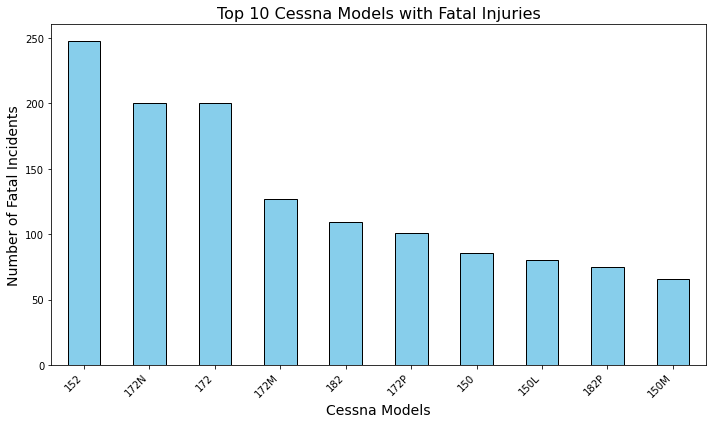

In [73]:
# Plot the histogram 
plt.figure(figsize=(10, 6))
top_10_fatal_cessna_models.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Top 10 Cessna Models with Fatal Injuries', fontsize=16)
plt.xlabel('Cessna Models', fontsize=14)
plt.ylabel('Number of Fatal Incidents', fontsize=14)

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # To avoid label overlap
plt.show()

#### Plotting top 10 cessna models with highest non fatal incidences

In [74]:
#  Filter for fatal incidents
non_fatal_cessna_data = cessna_data[cessna_data['Injury.Severity'] == 'Non-Fatal']

#  Group by 'Model' and count the incidents
non_fatal_cessna_model_counts = non_fatal_cessna_data.groupby('Model').size()

#  Sort the counts in descending order and get top 10 models
top_10_non_fatal_cessna_models = non_fatal_cessna_model_counts.sort_values(ascending=False).head(10)

#  Display the result
print("Top 10 Cessna Models with Most Non-Fatal Incidents:")
print(top_10_non_fatal_cessna_models)

Top 10 Cessna Models with Most Non-Fatal Incidents:
Model
152     2095
172     1528
172N     948
150      734
172M     654
172P     581
180      571
182      541
150M     514
150L     372
dtype: int64


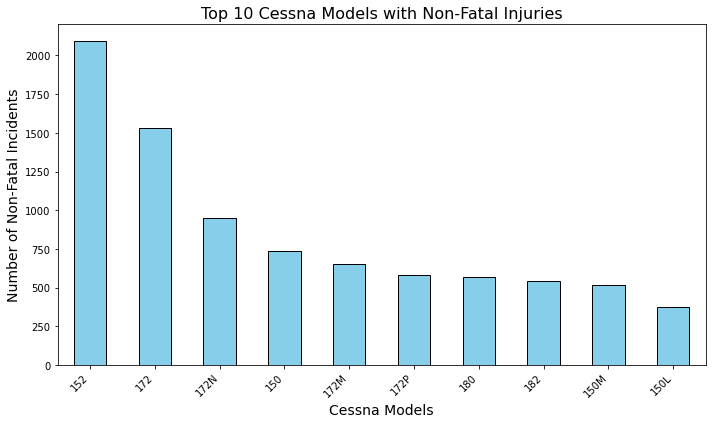

In [75]:
# Plot the histogram 
plt.figure(figsize=(10, 6))
top_10_non_fatal_cessna_models.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Top 10 Cessna Models with Non-Fatal Injuries', fontsize=16)
plt.xlabel('Cessna Models', fontsize=14)
plt.ylabel('Number of Non-Fatal Incidents', fontsize=14)

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # To avoid label overlap
plt.show()